# Data analysis for IPL Teams 

IPL is one of the biggest cricket leagues of the world, attracting millions of fans from around the globe. In this project, we have a dataset that has all the information since the inaugural audition of tata IPL up till 2024. This dataset includes details like venues, teams, toss winner, match winner and many other things. We aim to uncover trends and patterns that could influence match results and how the tournament have evolved over the years.

## Importing all necessary modules, files

Firstly we would import all the modules and packages that we would be using to analyze this dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [3]:
df = pd.read_csv('matches.csv')

In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

We will start off by seeing which one is the most succssfull team of the IPL
- We will start by skimming the dataset and just restricting to the columns needed for this analyzation

In [5]:
df1 = df[[
          #'id', 'season', 'city', 'date', 'match_type', 'player_of_match',
          #'venue', 
          'team1', 'team2', 
          #'toss_decision', 
          'winner'
          #'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
          #'method', 'umpire1', 'umpire2'
        ]].copy()

- We will make a dataframe that will have a team stats of how many matches played versus the number of matches won, this can help us to see which team has most win percentage in the IPL and hence is most successfull.

In [6]:
matches_played = pd.concat([df1['team1'], df1['team2']], axis=0).value_counts()
matches_won = df['winner'].value_counts()

team_stats = pd.DataFrame(
    {'Matches played': matches_played,
     'Matches won': matches_won}
    )

team_stats = team_stats.reset_index().rename(columns={'index':'Teams'})
team_stats

,Teams,Matches played,Matches won
0,Chennai Super Kings,238,138
1,Deccan Chargers,75,29
2,Delhi Capitals,91,48
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Gujarat Titans,45,28
6,Kings XI Punjab,190,88
7,Kochi Tuskers Kerala,14,6
8,Kolkata Knight Riders,251,131
9,Lucknow Super Giants,44,24


One important thing to mention here is that as noticed in the dataset is that there are few teams whose names have changed as the tournament have progressed over the years. We will use a map to fix the same. 

In [7]:
team_map = {
    'Delhi Capitals': 'Delhi Daredevils',
    'Gujarat Lions': 'Gujarat Titans',
    'Kings XI Punjab': 'Punjab Kings',
    'Pune Warriors': 'Rising Pune Supergiants',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Royal Challengers Bangaluru': 'Royal Challengers Bengaluru'  
}


team_stats['Teams'] = team_stats['Teams'].replace(team_map)

team_stats = team_stats.groupby('Teams', as_index=False).sum()
team_stats

,Teams,Matches played,Matches won
0,Chennai Super Kings,238,138
1,Deccan Chargers,75,29
2,Delhi Daredevils,252,115
3,Gujarat Titans,75,41
4,Kochi Tuskers Kerala,14,6
5,Kolkata Knight Riders,251,131
6,Lucknow Super Giants,44,24
7,Mumbai Indians,261,144
8,Punjab Kings,246,112
9,Rajasthan Royals,221,112


In [8]:
team_stats['Win %'] = team_stats['Matches won']/team_stats['Matches played'] * 100
team_stats

,Teams,Matches played,Matches won,Win %
0,Chennai Super Kings,238,138,57.983193
1,Deccan Chargers,75,29,38.666667
2,Delhi Daredevils,252,115,45.634921
3,Gujarat Titans,75,41,54.666667
4,Kochi Tuskers Kerala,14,6,42.857143
5,Kolkata Knight Riders,251,131,52.191235
6,Lucknow Super Giants,44,24,54.545455
7,Mumbai Indians,261,144,55.172414
8,Punjab Kings,246,112,45.528455
9,Rajasthan Royals,221,112,50.678733


To avoid any unfair advantage we will only focus on the teams that have played atleast 50 matches to avoid any small-sample bais

In [9]:
team_stats = team_stats.loc[team_stats['Matches played'] > 50]
team_stats

,Teams,Matches played,Matches won,Win %
0,Chennai Super Kings,238,138,57.983193
1,Deccan Chargers,75,29,38.666667
2,Delhi Daredevils,252,115,45.634921
3,Gujarat Titans,75,41,54.666667
5,Kolkata Knight Riders,251,131,52.191235
7,Mumbai Indians,261,144,55.172414
8,Punjab Kings,246,112,45.528455
9,Rajasthan Royals,221,112,50.678733
10,Rising Pune Supergiants,76,27,35.526316
11,Royal Challengers Bengaluru,255,123,48.235294


In [10]:
max_win = team_stats['Win %'].max()
top_team = team_stats.loc[team_stats['Win %'] == max_win]['Teams']
print(f'Most succesfull team of IPL is {top_team.iloc[0]} with a win percentage of {team_stats['Win %'].max(): .2f}')

Most succesfull team of IPL is Chennai Super Kings with a win percentage of  57.98


We can also plot the graphs for win percentage of different teams.

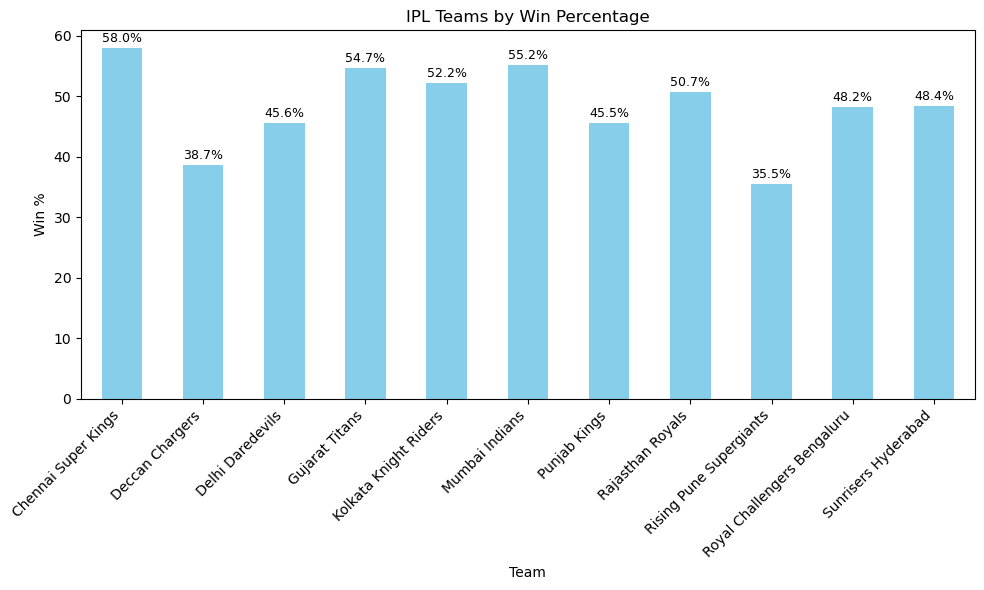

In [11]:
ax = team_stats.plot(
    kind='bar',
    x='Teams',
    y='Win %',
    legend=False,
    figsize=(10, 6),
    color='skyblue'
)

plt.title('IPL Teams by Win Percentage')
plt.ylabel('Win %')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')

# Add labels on top of each bar
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.5,  # slight offset above bar
        f'{value:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

# Few misconceptions about baisness.

##### There has been a growing discussion on social media platforms and among fans, particularly around the idea that many IPL matches are extremely close and exciting, leading some to speculate that the matches might be fixed. Recently, another trend has emerged, focusing on the perceived unfair advantage that teams gain after winning the toss. This perception has been fueled by a misrepresentation of a recent toss, sparking belief among fans that tosses are often biased to favor certain teams, especially the favorites.

##### Such claims have the potential to demotivate viewers and create a negative impact on the sport's credibility. Additionally, this narrative has contributed to a significant surge in betting-related discussions, as people question the fairness of the toss and the resulting outcomes.

##### In this analysis, we aim to explore whether there is any statistical evidence supporting the idea that winning the toss actually provides a significant advantage in the IPL. We will analyze data to determine the average win percentage of teams that win the toss over the years and assess whether the venue of the match plays a role in this advantage. Through this data-driven approach, we hope to clarify whether the toss truly impacts the outcome of the game.

### Skimming the dataset as per requirement

In [34]:
df = df[[ 'season', 
    #'id','city', 'date', 'match_type', 'player_of_match',
    'venue', 
    'team1', 'team2', 'toss_winner', 
    #'toss_decision', 
    'winner',
    #'result','result_margin', 'target_runs', 'target_overs', 'super_over',
    #'method', 'umpire1', 'umpire2'
   ]].copy()
df

,season,venue,team1,team2,toss_winner,winner
0,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,2007/08,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,2007/08,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,2007/08,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,2007/08,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...,...,...
1090,2024,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad
1091,2024,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
1092,2024,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals
1093,2024,MA Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,Sunrisers Hyderabad


As noticed in the data there are quite a few stadiums that have same names but still looks different because of typos and other things. Creating a venue map to fix the names.

In [14]:
venue_mapping = {
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Zayed Cricket Stadium, Abu Dhabi': 'Sheikh Zayed Stadium',
}

df['venue'] = df['venue'].replace(venue_mapping)

Add a column in the dataset that gives us a boolean value for team that wins the match after winning the toss

In [36]:
df['toss_win_match_win'] = df['toss_winner'] == df['winner']
df

,season,venue,team1,team2,toss_winner,winner,toss_win_match_win
0,2007/08,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,False
1,2007/08,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,True
2,2007/08,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,False
3,2007/08,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,False
4,2007/08,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders,False
...,...,...,...,...,...,...,...
1090,2024,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,False
1091,2024,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,False
1092,2024,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,True
1093,2024,MA Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,Sunrisers Hyderabad,False


In [16]:
toss_win_rate = df['toss_win_match_win'].mean()
print(f"Toss winner also won the match in {toss_win_rate:.2%} of matches")

Toss winner also won the match in 50.59% of matches


It is clear from the analysis above that the teams winning the toss only win the match 50% of the time. Hence toss has no such unfair advantage on the match. We will also check to see if this have changed over the years

In [17]:
toss_bais = df.groupby('season')['toss_win_match_win'].sum()

total_matches = df.groupby('season')['toss_win_match_win'].count()

toss_win_percent = (toss_bais / total_matches) * 100


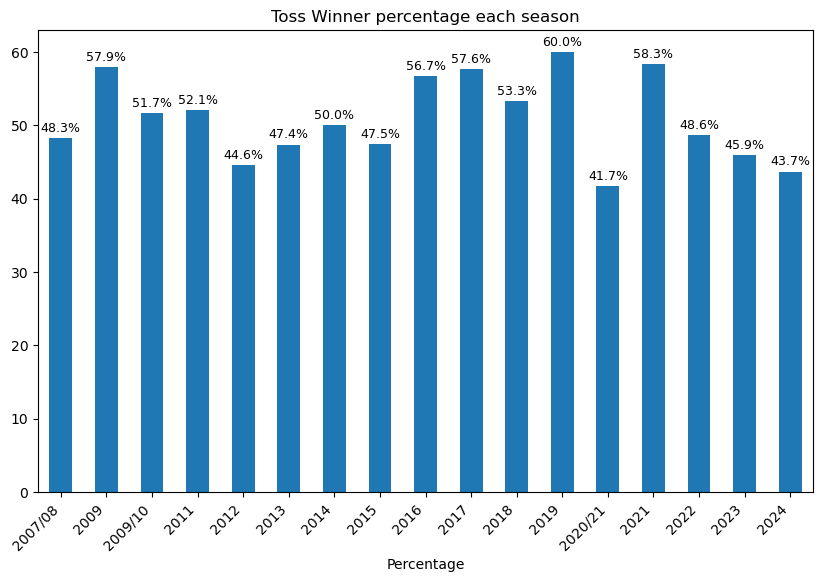

The average percentage of toss advantage that teams had over the years is 50.89


In [25]:
ax = toss_win_percent.plot(kind='bar', title='Toss Winner percentage each season', figsize=(10,6))
ax.set_xlabel('Percentage')
plt.xticks(rotation = 45, ha='right')
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.5,
        f'{value:.1f}%',
        ha = 'center',
        va = 'bottom',
        fontsize = 9,
        color = 'black'
    )
plt.show()
print(f"The average percentage of toss advantage that teams had over the years is {toss_win_percent.mean():.2f}")

### The analysis above provides a clearer picture for spectators, showing that winning the toss does not consistently offer a significant advantage. Except for 2019—where 60% of the teams that won the toss also won the match—in all other years, the win percentage after winning the toss remained in the 50s, indicating only a marginal impact.

We will also analyze whether there is any bias associated with different venues and how they might influence the outcome after a team wins the toss.

In [28]:
total_matches_at_venue = df.groupby('venue')['toss_win_match_win'].count()
popular_venue = total_matches_at_venue[total_matches_at_venue > 20].index
df_popular = df[df['venue'].isin(popular_venue)]
toss_win_rate = df_popular.groupby('venue')['toss_win_match_win'].mean()*100

The average percentage of toss advantage on different venues over the years is 49.97


Text(0.5, 0, 'Percentage')

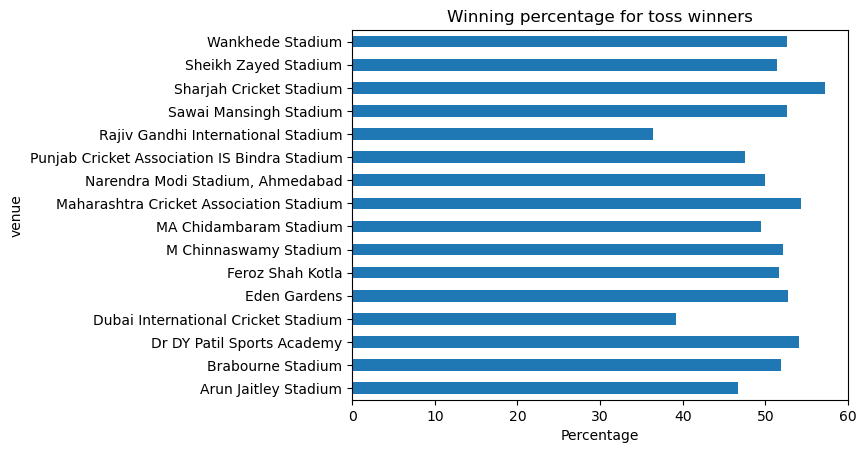

In [38]:
print(f"The average percentage of toss advantage on different venues over the years is {toss_win_rate.mean():.2f}")
ax = toss_win_rate.plot(kind='barh', title='Winning percentage for toss winners')
ax.set_xlabel('Percentage')


##### Based on the data analysis, the average win percentage for teams that won the toss across different venues over the years is approximately 49.97%, indicating virtually no significant advantage. Most venues consistently show a near 50% win rate for toss-winning teams, further reinforcing the conclusion that winning the toss does not strongly influence match outcomes. This suggests that the perception of toss bias or unfair advantage is largely unfounded, and match results are more likely determined by team performance rather than the toss.